

<p>En este ejercicio vamos a estudiar una familia de aut&oacute;matas celulares de dimensi&oacute;n uno. El "juego de la vida", que hemos visto en clase, es un aut&oacute;mata celular de dimensi&oacute;n dos y, por tanto, algo m&aacute;s complicado que los que veremos en este ejercicio. El dato principal es una lista de ceros y unos que representar&aacute; el estado inicial del aut&oacute;mata. En el juego de la vida, en lugar de una lista como estado inicial us&aacute;bamos una matriz.</p>
<ol>
<li><span style="color: #ff0000;">Define </span> una funci&oacute;n de SAGE $vecinos(k,L)$ que para cada entero $k$ entre $0$ y $len(L)-1$ devuelva la $3$-upla&nbsp; formada por el elemento de $L$ anterior a $L[k]$, el elemento $L[k]$ y el siguiente a $L[k]$, teniendo en cuenta que el siguiente al &uacute;ltimo debe ser el primero y el anterior al primero debe ser el &uacute;ltimo.&nbsp; </li>
<li>Genera la lista de todas las $3$-uplas de ceros y unos.&nbsp; Debes usar una variante de la funci&oacute;n que&nbsp; aparec&iacute;a en el examen anterior,&nbsp; ya que el orden en que aparecen es importante. Hay ocho $3$-uplas en la lista.</li>
<li>Cada entero&nbsp; $\ge 0$ y $\le 255$ se puede escribir en binario con $8$ bits (rellenando con ceros cuando haga falta). Dado un tal entero le podemos hacer corresponder, de esta manera,&nbsp; una lista de $8$ ceros o unos.</li>
<li><span style="color: #ff0000;">Define </span>&nbsp; una funci&oacute;n de SAGE que reciba como argumento un entero $0\le k\le 255$ y devuelva un diccionario con claves las $3$-uplas del apartado $2$ y, para cada $3$-upla tome valor el cero o uno que ocupa el mismo lugar en la lista del apartado $3$. </li>
<li><span style="color: #ff0000;">Define  </span>una funci&oacute;n de SAGE $siguiente(L,k)$ que reciba como argumentos una lista $L$ de ceros o unos y un entero $0\le k\le 255$ y devuelva otra lista de la misma longitud que $L$&nbsp; que en el lugar $i$ tenga el valor que el diccionario del apartado $4$ asigna a la $3$-upla de vecinos de $L[i].$ Esta funci&oacute;n es la que determina la evoluci&oacute;n en el tiempo del aut&oacute;mata.</li>
<li><span style="color: #ff0000;">Define </span> una funci&oacute;n $evolucion(L,k,N)$ que devuelva la lista de listas, de longitud $N+1$,&nbsp; que se obtiene al iterar, $N$ veces,&nbsp; la funci&oacute;n $siguiente$ partiendo del valor dado de $L$, es decir, debe devolver la lista $$[L,siguiente(L),siguiente(siguiente(L)),\dots,siguiente^{N}(L)].$$</li>
<li>Podemos transformar la lista devuelta por $evolucion(L,k,N)$ en una matriz con $N+1$ filas y $len(L)$ columnas, y representar gr&aacute;ficamente la matriz usando $matrix\_plot$. <span style="color: #ff0000;">Obtener esas representaciones gr&aacute;ficas (2 puntos)</span> para valores de $k=18,30,50,110$, $N=256$ y la lista $L$ inicial formada por $128$ ceros, un uno y otros $128$ ceros. Observa las diferencias en las caracter&iacute;sticas de los gr&aacute;ficos obtenidos.</li>
</ol>

<h4>Apartado 1</h4>

In [19]:
def vecinos(j,L):
    return tuple([L[j-1%len(L)],L[j],L[(j+1)%len(L)]])

<h4>Apartado 2</h4>

In [20]:
def listas(K):
    L = []
    for p in srange(2^K):
       L.append(tuple(p.digits(base=2,padto=K)))
    return L

In [21]:
listas(3)

[(0, 0, 0),
 (1, 0, 0),
 (0, 1, 0),
 (1, 1, 0),
 (0, 0, 1),
 (1, 0, 1),
 (0, 1, 1),
 (1, 1, 1)]

<h4>Apartado 4</h4>

In [22]:
def diccionario(k):
    C = zip(listas(3),(k).digits(base=2,padto=8))
    return dict(C)

In [23]:
print 18.digits(base=2,padto=8);print diccionario(18)

[0, 1, 0, 0, 1, 0, 0, 0]
{(1, 1, 0): 0, (0, 1, 1): 0, (1, 0, 0): 1, (0, 0, 1): 1, (1, 0, 1): 0, (0, 0, 0): 0, (0, 1, 0): 0, (1, 1, 1): 0}


<h4>Apartado 5</h4>

In [24]:
def siguiente(L,k):
    LL = []
    n = len(L)
    dic = diccionario(k)
    for j in srange(n):
        V = vecinos(j,L)
        #print V
        LL.append(dic[V])
    return LL

In [25]:
siguiente([0,0,1,0,1,1,1,0],18)

[0, 1, 0, 0, 0, 0, 0, 1]

<h4>Apartado 6</h4>

In [26]:
def evolucion(L,k,N):
    LL = [L]
    for int in srange(N):
        LL.append(siguiente(LL[-1:][0],k))
    return LL

In [27]:
evolucion([0,0,1,0,1,1,1,0],7,5)

[[0, 0, 1, 0, 1, 1, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 1, 1, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1]]

<h4>Apartado 7</h4>

In [28]:
matrix_plot(matrix(ZZ,evolucion([0]*128+[1]+[0]*128,18,256))).save('/tmp/automata18-C.png')

El valor de k es 18


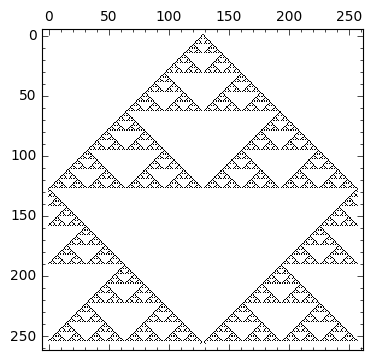

El valor de k es 30


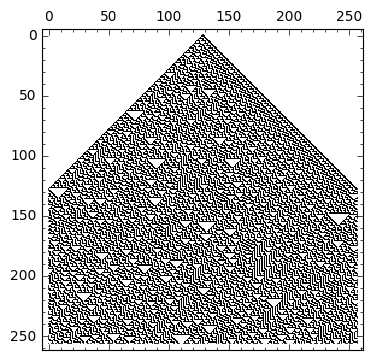

El valor de k es 50


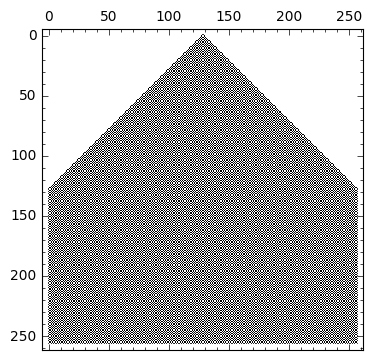

El valor de k es 110


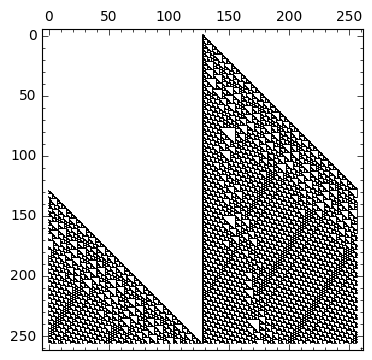

In [29]:
for k in [18,30,50,110]:
    print "El valor de k es",k
    matrix_plot(matrix(ZZ,evolucion([0]*128+[1]+[0]*128,k,256))).show(figsize=5)
    

<p><span style="color: #ff0000;">El valor de $k=50$ no es muy interesante, aunque es regular, en cambio, $k=18$ produce un resultado muy regular pero complejo y semejante al llamado tri&aacute;ngulo de Sierpinski. Los otros dos valores son m&aacute;s interesantes todav&iacute;a: el valor $k=30$ produce un resultado de apariencia bastante aleatoria en la posici&oacute;n y tama&ntilde;o de los triangulitos negros, y de hecho se puede usar para generar n&uacute;meros (pseudo)-aleatorios mientras que el caso $k=110$ tiene el aspecto de una estructura muy organizada, nada aleatoria, pero bastante complicada. Se ha demostrado que este &uacute;ltimo caso es capaz de simular una m&aacute;quina universal de Turing y, por tanto, es como un ordenador capaz de ejecutar cualquier programa finito.</span></p>

<h4></h4>